# Handling Missing data in a dataset 
<hr style="border:1px solid Orange; width:100%">

## Complete Case Analysis (CCA)
<mark>This technique is not used that often because of many reasons, one of the most crucial reason is <i>When using our models in production, hte model will not know how to handle with the missing data.</i> </mark>
<br>
<br>
**Where do we use it :**
* Your data is missing completly at random. <mark>(MCAR)</mark>
* Generally if the missing data is less than 5% in that column.
<br>
<br>
> Syntax : df.dropna()

## Univeriate Imputation
#### Advantages
- **Simple to implement**: Univariate imputation is a straightforward method that can be easily implemented in most programming languages.  
- **Fast computation**: Univariate imputation is computationally efficient and can handle large datasets quickly.  
- **Easy to interpret**: The results of univariate imputation are easy to understand and interpret.  

#### Disadvantages  
- **Assumes independence**: Univariate imputation assumes that the missing values are independent of the other variables, which may not always be the case.  
- **Ignores relationships**: Univariate imputation ignores the relationships between variables, which can lead to biased estimates.  
- **May not handle non-normal data**: Univariate imputation assumes normality of the data, which may not be true for all datasets.  
- **Can lead to over-imputation**: Univariate imputation can lead to over-imputation, where the same value is imputed for multiple missing values.  

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer    
from sklearn.compose import ColumnTransformer  

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day36-imputing-numerical-data/titanic_toy.csv')

In [12]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [13]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

trf1 = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
],remainder='passthrough')

X_train_transformed = trf1.fit_transform(X_train)
X_test_transformed = trf1.transform(X_test)

# Make DataFrame from transformed data
transformed_df = pd.DataFrame(X_train_transformed, columns=['Age', 'Fare', 'Family'])
trained_df = pd.DataFrame(X_train, columns=['Age', 'Fare', 'Family'])



In [15]:
trained_df.head()

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6


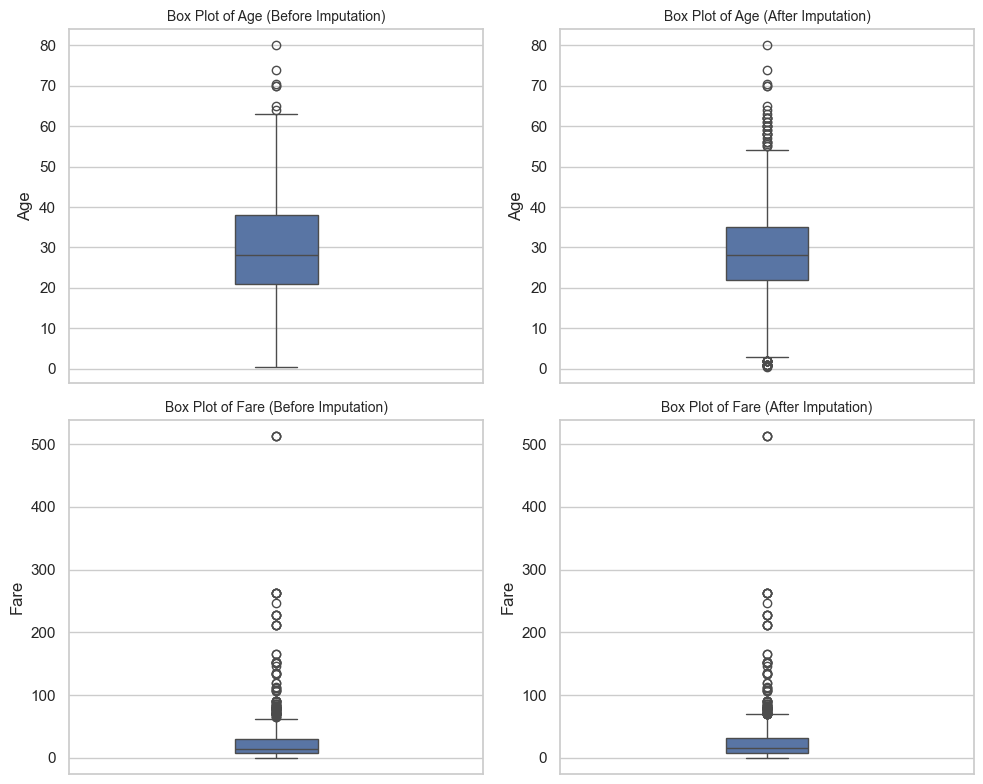

In [16]:
sns.set(style="whitegrid")

# Create a figure with four subplots (2 rows, 2 columns)
plt.figure(figsize=(10, 8))  # Adjusted figure size for 4 plots

# First subplot: Age before imputation
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first plot
sns.boxplot(data=trained_df, y='Age', width=0.2)
plt.title('Box Plot of Age (Before Imputation)', fontsize=10)

# Second subplot: Age after imputation
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second plot
sns.boxplot(data=transformed_df, y='Age', width=0.2)
plt.title('Box Plot of Age (After Imputation)', fontsize=10)

# Third subplot: Fare before imputation
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third plot
sns.boxplot(data=trained_df, y='Fare', width=0.2)
plt.title('Box Plot of Fare (Before Imputation)', fontsize=10)

# Fourth subplot: Fare after imputation
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth plot
sns.boxplot(data=transformed_df, y='Fare', width=0.2)
plt.title('Box Plot of Fare (After Imputation)', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Most Frequent Value Imputation (Mode) For Categorical Data  

#### <mark>Assumptions</mark>
* Your Data Should Be MCAR
* The Mode value should be much more frequent than the rest values. 

If the mode is less than 10% from other values then you can create a new category named <mark>Missing</mark>.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day37-handling-missing-categorical-data/train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

* Garagequali ---> Mode, Value_count, 
* Fireplace_quali ---> Value_count, Mode, PDF Curve, 

In [19]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [20]:
new_df = df.copy()
new_df['GarageQual'].fillna(new_df['GarageQual'].mode()[0], inplace=True)

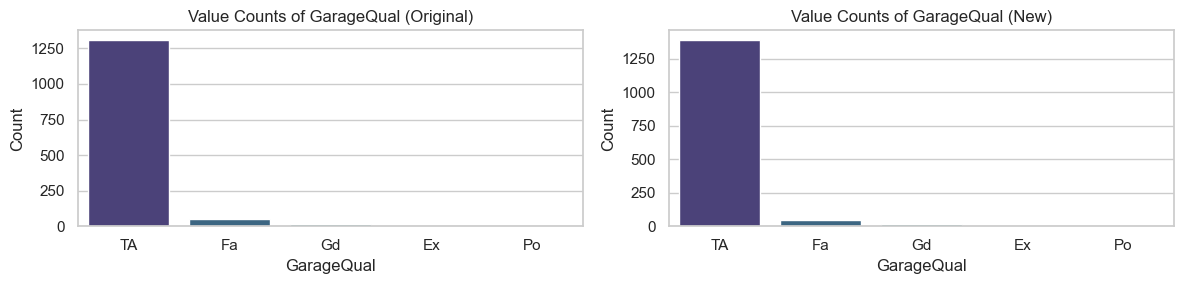

In [21]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# Plot the first barplot in the first subplot
sns.barplot(x=df['GarageQual'].value_counts().index, y=df['GarageQual'].value_counts().values, palette='viridis', ax=axs[0])
axs[0].set_title('Value Counts of GarageQual (Original)')
axs[0].set_xlabel('GarageQual')
axs[0].set_ylabel('Count')

# Plot the second barplot in the second subplot
sns.barplot(x=new_df['GarageQual'].value_counts().index, y=new_df['GarageQual'].value_counts().values, palette='viridis', ax=axs[1])
axs[1].set_title('Value Counts of GarageQual (New)')
axs[1].set_xlabel('GarageQual')
axs[1].set_ylabel('Count')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()


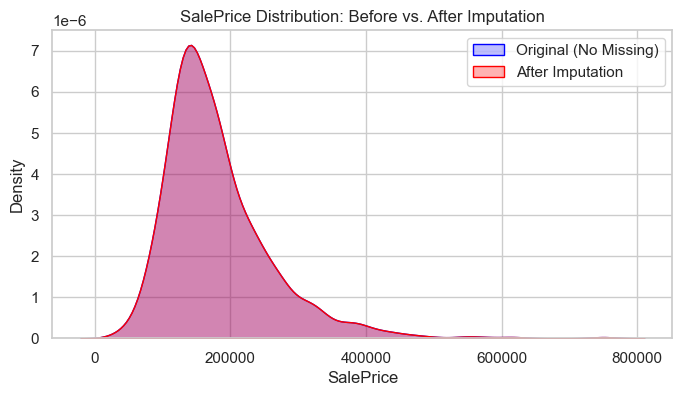

In [22]:
# PDF Curve for sales after and before imputation
plt.figure(figsize=(8, 4))

# Before imputation (missing values excluded)
sns.kdeplot(data=df, x='SalePrice', label='Original (No Missing)', fill=True,  color='blue')

# After imputation (assuming missing GarageQual affects SalePrice)
sns.kdeplot(data=new_df, x='SalePrice', label='After Imputation', fill=True, color='red', alpha=0.3)

plt.title('SalePrice Distribution: Before vs. After Imputation')
plt.legend()
plt.show()
plt.show()

**Key Observations**

### Similar Shapes

Both curves peak around the same price (~$200K), suggesting imputation didn’t drastically alter the overall distribution.

### Minor Differences

* The red curve (after imputation) is slightly taller near the peak, meaning:
	+ More houses now fall into the most common price range after imputation.
	+ This happens because missing GarageQual values were replaced with the mode (TA), which likely correlates with average-priced homes.

### No Major Shifts

* The curves overlap significantly, indicating no severe bias was introduced by imputation.

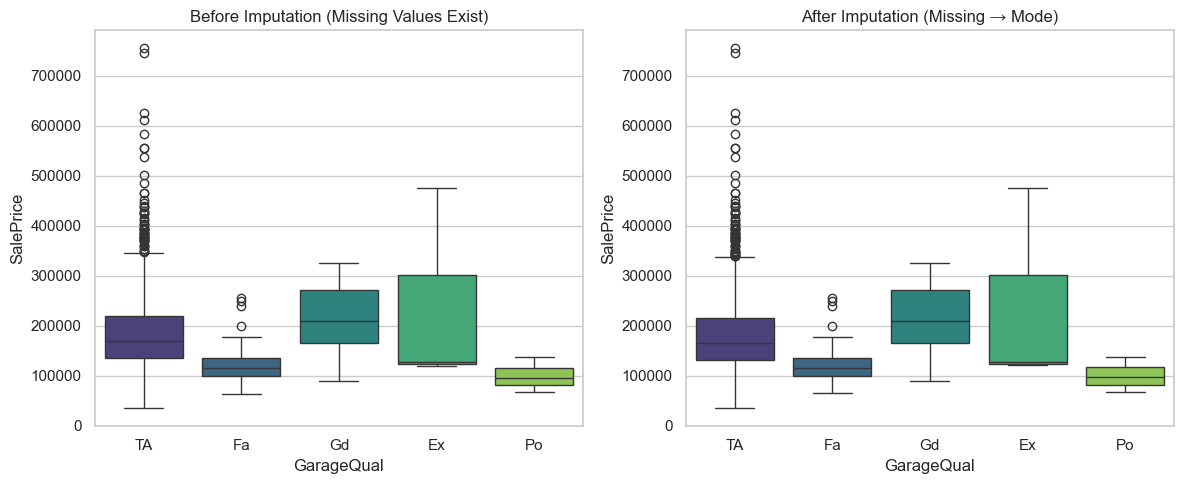

In [23]:
# Box Plot For GarageQual vs SalePrice before and after imputation
plt.figure(figsize=(12, 5))

# Before imputation (missing values as a separate group)
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='GarageQual', y='SalePrice', palette='viridis')
plt.title('Before Imputation (Missing Values Exist)')

# After imputation (missing values replaced)
plt.subplot(1, 2, 2)
sns.boxplot(data=new_df, x='GarageQual', y='SalePrice', palette='viridis')
plt.title('After Imputation (Missing → Mode)')

plt.tight_layout()
plt.show()

### Random Imputation 
Filling with a random number from the dataset itself to the missing data.
* Can be applied to both categorical and numerical data. 
* Distribution and variance remains the same even after imputing.
* <mark>Used in linear models not for tree models.</mark>
 

##### Numerical Data

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
# For numerical data 
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day38-missing-indicator/train.csv')

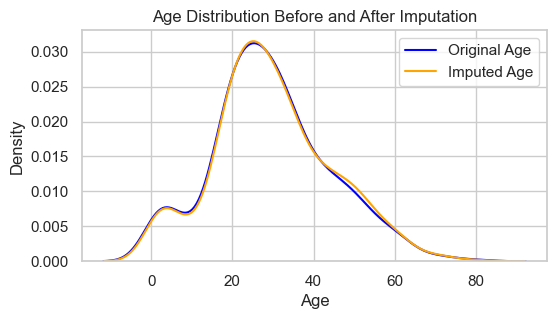

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=42)

X_train['Age_imputed'] = X_train['Age'].copy()
X_test['Age_imputed'] = X_test['Age'].copy()
# Fill all the missing values with a randomly generated value
X_train['Age_imputed'][X_train['Age'].isnull()] = X_train['Age'].sample(X_train['Age'].isnull().sum(), random_state=42).values
X_test['Age_imputed'][X_test['Age'].isnull()] = X_test['Age'].sample(X_test['Age'].isnull().sum(), random_state=42).values

X_test_df = pd.DataFrame(X_test, columns=['Age', 'Fare', 'Family', 'Age_imputed'])
X_train_df = pd.DataFrame(X_train, columns=['Age', 'Fare', 'Family', 'Age_imputed'])

# Plotting the distribution of Age before and after imputation
plt.figure(figsize=(6, 3))
sns.kdeplot(X_train_df['Age'], label='Original Age', color='blue')
sns.kdeplot(X_train_df['Age_imputed'], label='Imputed Age', color='orange')

plt.legend()
plt.title('Age Distribution Before and After Imputation')
plt.show()

##### Categorical Data 

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day38-missing-indicator/house-train.csv', usecols = ['GarageQual', 'FireplaceQu', 'SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [28]:
X = df 
Y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train['GarageQual_imputed'] = X_train['GarageQual'].copy()
X_test['GarageQual_imputed'] = X_test['GarageQual'].copy()

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu'].copy()
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu'].copy()

In [29]:
X_train['GarageQual_imputed'][X_train['GarageQual'].isnull()] = X_train['GarageQual'].sample(X_train['GarageQual'].isnull().sum(), random_state=42).values
X_test['GarageQual_imputed'][X_test['GarageQual'].isnull()] = X_test['GarageQual'].sample(X_test['GarageQual'].isnull().sum(), random_state=42).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu'].isnull()] = X_train['FireplaceQu'].sample(X_train['FireplaceQu'].isnull().sum(), random_state=42).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu'].isnull()]


892     NaN
614     NaN
649     NaN
887     NaN
1252    NaN
       ... 
989     NaN
677     NaN
1410    NaN
479     NaN
722     NaN
Name: FireplaceQu_imputed, Length: 143, dtype: object

In [30]:
# Frequency of all the categories in GarageQual before and after imputation
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train),
    ], axis = 1, keys=['Original', 'Imputed']
)
temp

,Original,Imputed
TA,0.951087,0.946062
Fa,0.032609,0.035103
Gd,0.011775,0.012842
Ex,0.002717,0.002568
Po,0.001812,0.001712


##### <mark>Red Flag</mark>

In [31]:
# Frequency of all the categories in FireplaceQu before and after imputation
temp2 = pd.concat(
    [
        X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts() / len(X_train),
    ], axis = 1, keys=['Original', 'Imputed']    
)
temp2       # FireplaceQu has more missing values than GarageQual, so the imputed values are more significant in this case. 

,Original,Imputed
Gd,0.491143,0.379281
TA,0.405797,0.308219
Fa,0.043478,0.029966
Ex,0.033816,0.025685
Po,0.025765,0.023116


### Missing Indicator 

* We creates a new column for a missing category.

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day38-missing-indicator/train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [33]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)
X_train_trf

array([[ 45.5   ,  28.5   ],
       [ 23.    ,  13.    ],
       [ 32.    ,   7.925 ],
       ...,
       [ 41.    ,  14.1083],
       [ 14.    , 120.    ],
       [ 21.    ,  77.2875]], shape=(712, 2))

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_trf, y_train)
y_pred = lr.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6480446927374302

In [36]:
from sklearn.impute import MissingIndicator
mi = MissingIndicator()
X_train_mi = mi.fit_transform(X_train)
X_test_mi = mi.transform(X_test)

# Put the missing indicator in the training set
X_train['Age_missing'] = X_train_mi
X_test['Age_missing'] = X_test_mi

##### Directly in scikit learn 

In [37]:
si = SimpleImputer(add_indicator=True)       # Use the add_indicator parameter to add a missing indicator column    
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_trf, y_train)
y_pred = lr.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6368715083798883

#### Automatically select the parameter for the Imputaton value

In [38]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day38-missing-indicator/train.csv')

In [40]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
numerical_features = ['Age', 'Fare']
numercal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categoraical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numercal_transformer, numerical_features),
    ('cat', categorical_transformer, categoraical_features)
])

In [42]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [43]:
from sklearn import set_config
set_config(display='diagram')  # Display the pipeline as a diagram
clf

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [44]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)
# Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}
print(f"Internal CV score: {grid_search.best_score_:.3f}")
# Internal CV score: 0.788
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy']].head(10)  # Display the top 10 results with the best parameters

Best params:
{'classifier__C': 0.1, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}
Internal CV score: 0.784


,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy
0,0.1,most_frequent,mean
1,0.1,most_frequent,median
2,0.1,constant,mean
3,0.1,constant,median
4,1.0,most_frequent,mean
5,1.0,most_frequent,median
6,1.0,constant,mean
7,1.0,constant,median
8,10.0,most_frequent,mean
9,10.0,most_frequent,median


### KNN Imputer 
Here we often seeks for the k nearest value to the missing value (By calculating Euclidian distance) & then calculating the <mark>mean</mark> of the distances.

**Fomula to calculate the nan Euclidean distance : (sklearn)** 

$$d = \sqrt{weight*((x_2 - x_1)^2 + (y_2 - y_1)^2)}$$
* Where <i>weight</i> is : <mark>Total number of co-ordinates / Number of present co-ordinate </mark> 
* This is more accurate. 


In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day39-knn-imputer/train.csv')

##### There are two parameters for weight in KNNImputer(n_neighbour= , weight='distance' or 'uniform'), when it is weight then there is different approach to calculate the net distance ( We multiply the resiprocal of the distance with the point and add them then divide them by n(nearest neighbours) value)

In [48]:
df = df[['Age', 'Pclass', 'Fare', 'Survived']]
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNNImputer(n_neighbors=5)

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)
pd.DataFrame(X_train_trf, columns=X.columns)

,Age,Pclass,Fare
0,45.5,1.0,28.5000
1,23.0,2.0,13.0000
2,32.0,3.0,7.9250
3,26.0,3.0,7.8542
4,6.0,3.0,31.2750
...,...,...,...
707,21.0,3.0,7.6500
708,39.0,1.0,31.0000
709,41.0,3.0,14.1083
710,14.0,1.0,120.0000


In [49]:
# Predication of transformed data using logistic regression
lr = LogisticRegression()   
lr.fit(X_train_trf, y_train)
y_pred = lr.predict(X_test_trf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.74


## Iteraative Imputer / MICE

* Works well and accurate on the small datasets but the memory gets higher for the larger datasets.